<h1>Digit Recognizer<h1>

<h2>Introduction:</h2>

The computer vision has changed a lot in the world ranging from opening a phone with face recognition to self driving cars and all this development is result of Deep Learning.Deep Learning is going to be the future.....So,if your interested in getting started with this than
my suggestion is to take course of deep learning by Andrew NG it is an awesome course which gives all insights of deep learning...

Now in this kernel i am working on MNIST data set to build a digit Recognizer.....So let's get started.

In [1]:
#importing all the required libraries
import numpy as np#numpy array calculations
import pandas as pd#working with dataframe
import matplotlib.pyplot as plt#for visualizing the plots
import matplotlib.image as mpimg#To view images which are of the form of numbers
import seaborn as sns#For plotting

np.random.seed(0)#To get same results whenever i do this
from sklearn.model_selection import train_test_split#For validation and checking the preformance of model
from sklearn.metrics import confusion_matrix#To see where our model doing wrong
import itertools#For efficient looping
from keras.utils.np_utils import to_categorical#one hot encoding
from keras.models import Sequential#The CNN type it have other types like Residual etc.,.
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D#Types of layers
from keras.optimizers import RMSprop,Adam#fits the filter variables,weights etc.,.
from keras.preprocessing.image import ImageDataGenerator#For data augmentation
from keras.callbacks import ReduceLROnPlateau#To make sure the we reduce learning rate if model stopped learning, upto some limit

Using TensorFlow backend.


Setting style for our plots

In [2]:
sns.set(style='white',context='notebook',palette='deep')

<h2>Load Data</h2>

In [3]:
#Load the data
train=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As we see that we want that label as output so we will take out this from this dataframe into a separate output list

In [5]:
y_train=train['label']
X_train=train.drop(labels=['label'],axis=1)
del train

We deleted train dataframe as it is not going to be useful anyway.So now let's test data

In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Test data is good in the way we wanted it so now let's see how the data is.And how many training examples are there for each output(each digit).

In [7]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


We need to normalize the values and need to bring the mean and std to zero(for fast calculation of gradient descent)

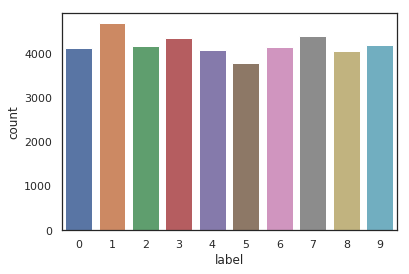

In [8]:
sns.countplot(y_train)

We can see that the data is well distributed So we have no problem with y_train

Now check any missing values are there.

In [9]:
X_train.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

There are no missing values in training and i also checked in test data also .... there are no missing values so no problem.Now let's move to next step of normalization.

In [10]:
X_train=X_train/255.0
test=test/255.0

The above will helps in getting faster outputs by coverging faster to the global minima.
Now we will reshape this into gray image(Add channel as 1, For RGB images we will have 3 channels).

Here as we don't know the number of images in a set We will generalise it by placing (-1 which it treats as 'n' that can be seen at run time)

In [11]:
X_train=X_train.values.reshape(-1,28,28,1)#making an 3D array like (28*28*1) how an actual image look.
test=test.values.reshape(-1,28,28,1)

Now as the output variable is categorical values we will hot encode it into a vector.So we can apply softmax function for getting output easily.

In [12]:
y_train=to_categorical(y_train,num_classes=10)


Now split to training and validation sets....

In [13]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=0)#specify random state to get same outputs

In deep learning always remember we can have large datasets most of the times so we don't split in 75% and 25% ratio rather we give a small percent like 4-10% for validating and testing and those are more than enough.

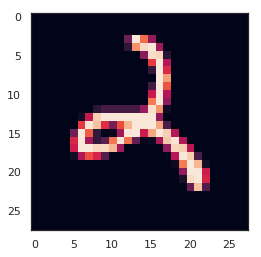

In [14]:
g=plt.imshow(X_train[1][:,:,0])#displays image

So we tranformed the input vectors to matrices to get images like this.Now let's build our Model:-

We will use:-

1)Convolution layers:-To find features from images

2)Pooling layers:-Generalising those features(like finding global features)

3)Flatten Layers:-converts to 1D vector

4)Fully connected layers:-Like neural networks (Last layer has 10 neurons with softmax function to get output).

Other things which we use:-

relu activation:-For non linearity.

Dropout:-Reduce overfitting.

Batch Normalization:-For making mini batch gradient descent faster

My model will be:-

Conv2D->Conv2D->Maxpool->Conv2D->Conv2D->Maxpool->Flatten->Dense(Fully connected)->Dense(Softmax)->output.


In [15]:

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))


Now:-

We need to set three things:-

1)Loss function:-categorical_crossentropy(for softmax)

2)score function:-accuracy(gives how correctly we are predicting the validation set)

3)optimizer:-Adam(Uses both concepts of momentum and RMSProp)

Optimizer let's you calculate the weights and filter values to represent the features.It updates the values by following gradient descent approch.

In [16]:
optimizer=Adam()

Now we can compile our model that means we finished our model to be use like an object after compilation.

In [17]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

Now parameter tuning for getting Global maximum and this is done by tuning the Learning rate.What we are doing is when we had no improvement in model we will slowly decrease the learning rate until some lower boundary....

The below arguments means:-

val_accuracy:-validation set accuracy

Patience:-How many epochs we see before reducing learning rate

verbose:-shows output of each epoch(takes values of 0->shows nothing,1->shows each epoch with ======= and 2->shows each epoch with number

factor:-by which we decrease the learning rate.

min_lr:-The lower boundary till we decrease the learning rate.

In [18]:
learning_rat=ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.001)
epochs=3
batch_size=64 #powers of two is better generally and by convention we follow this

<h2>Data Augmentation</h2>

Well we know that everyone won't write the digits with same width and in same angle with same clarity so we will perform the data augmentation techinque to make sure we can see all possibilities.

In [19]:
datagenerated=ImageDataGenerator(rotation_range=10,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1)

we rotated by 10degrees for some images and zooming some images by 10percent, shifts heights and widths to make sure we covered all the
possibilities of images we can get and we apply this to out X_train as seen below.

In [20]:
datagenerated.fit(X_train)

Now let's run the model for 3epochs it takes easily 30min.feel free to play with arguments and optimizers and archeticture by changing something so that you can get better in sights of what happening.

In [21]:
digit_rec=model.fit_generator(datagenerated.flow(X_train,y_train,batch_size=batch_size),
                              epochs=epochs,validation_data=(X_val,y_val),verbose=2,steps_per_epoch=X_train.shape[0],
                              callbacks=[learning_rat])

Epoch 1/3
 - 782s - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.0233 - val_accuracy: 0.9962
Epoch 2/3
 - 774s - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.0482 - val_accuracy: 0.9931
Epoch 3/3
 - 780s - loss: 0.0065 - accuracy: 0.9983 - val_loss: 0.0480 - val_accuracy: 0.9943


We will now work on predictions for test set

In [22]:
results=model.predict(test)
results=np.argmax(results,axis=1)
results=pd.Series(results,name='Label')

In [23]:
submission=pd.concat([pd.Series(range(1,28001),name='ImageId'),results],axis=1)

In [24]:
submission.to_csv("cnn_mnist_datagen.csv",index=False)